In [52]:
import scanpy
import anndata
import matplotlib
from matplotlib import pyplot
import hdf5plugin
import numpy
import scvelo
import seaborn
import pandas

In [53]:
scanpy.settings.set_figure_params(dpi=100, facecolor="white")

seq_file_path = "RNA Sequencing Data/velocity_adata_old_umap.h5ad"
adata = scanpy.read_h5ad(seq_file_path)
print(adata)

AnnData object with n_obs × n_vars = 12792 × 2000
    obs: 'barcode', 'sample', 'group', 'day', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'manual_root', 'manual_end', 'velocity_pseudotime', 'latent_time'
    var: 'ensemble_ids', 'gene_symbol', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2'
    uns: 'group_colors', 'log1p', 'neighbors', 'recover_dynamics', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_umap', 'veloci

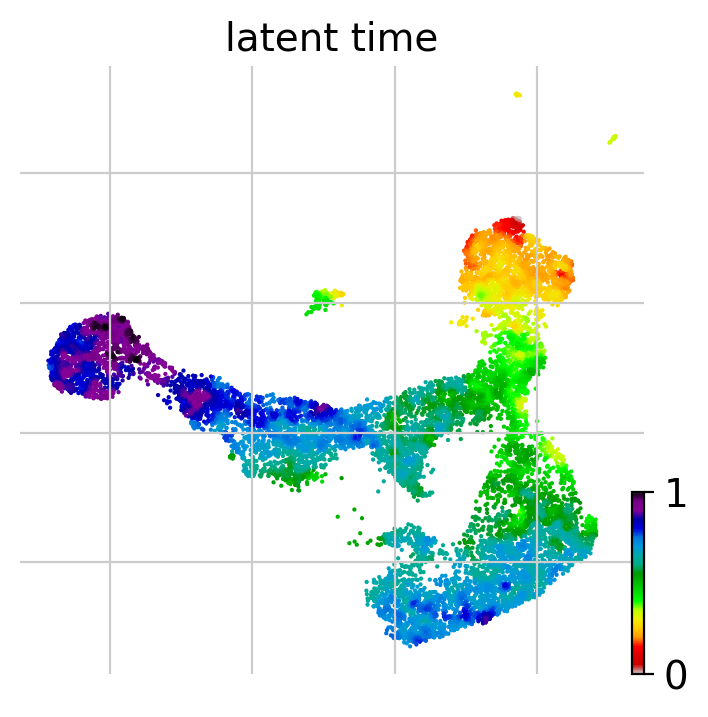

In [54]:
scvelo.pl.scatter(adata, color='latent_time', color_map='nipy_spectral_r', basis='umap')

In [55]:
identity_colors = [
    "#a8a8a8",
    '#fae2d8',
    '#eef1f8', 
    '#f3ad91',
    '#b6d8e5',
    '#eb684b',
    '#71add9',
    '#da2e24',
    '#3180bd',
    '#a81918',
    '#164f9b',
    '#0a652c'
]

identity_colors = [
    '#cbc9ca',
    "#ffd1be",
    "#ced8f0", 
    '#f3ad91',
    '#b6d8e5',
    '#eb684b',
    '#71add9',
    '#da2e24',
    '#3180bd',
    '#a81918',
    '#164f9b',
    '#0a652c'
]

identity_list = [
    "MEF",
    "Day 2 Control",
    "Day 2 Hic2 OX",
    "Day 4 Control",
    "Day 4 Hic2 OX",
    "Day 6 Control",
    "Day 6 Hic2 OX",
    "Day 9 Control",
    "Day 9 Hic2 OX",
    "Day 12 Control",
    "Day 12 Hic2 OX",
    "mESC",
]

identity_map = {
    "MEF": "MEF",
    "Pool1_mESC": "mESC",
    "Pool2_mESC": "mESC",
    "Repro_Day2_BFP": "Day 2 Control",
    "Repro_Day2_Hic2": "Day 2 Hic2 OX",
    "Repro_Day4_BFP": "Day 4 Control",
    "Repro_Day4_Hic2": "Day 4 Hic2 OX",
    "Repro_Day6_BFP": "Day 6 Control",
    "Repro_Day6_Hic2": "Day 6 Hic2 OX",
    "Repro_Day9_BFP": "Day 9 Control",
    "Repro_Day9_Hic2": "Day 9 Hic2 OX",
    "Repro_Day12_BFP": "Day 12 Control",
    "Repro_Day12_Hic2": "Day 12 Hic2 OX"
}


adata.obs["identity"] = adata.obs["sample"].map(identity_map).astype("category").cat.reorder_categories(identity_list)
adata.uns["identity_colors"] = identity_colors
print(adata.obs["identity"].unique())

['MEF', 'mESC', 'Day 2 Control', 'Day 2 Hic2 OX', 'Day 4 Control', ..., 'Day 6 Hic2 OX', 'Day 9 Control', 'Day 9 Hic2 OX', 'Day 12 Control', 'Day 12 Hic2 OX']
Length: 12
Categories (12, object): ['MEF', 'Day 2 Control', 'Day 2 Hic2 OX', 'Day 4 Control', ..., 'Day 9 Hic2 OX', 'Day 12 Control', 'Day 12 Hic2 OX', 'mESC']


In [56]:
adata.obs["manual_root"] = adata.obs["manual_root"].astype(float)
adata.obs["manual_end"] = adata.obs["manual_end"].astype(float)

In [57]:
# # Patch get_sparse_from_igraph: https://github.com/theislab/scvelo/issues/1241 

# import scvelo.tools.paga
# from scipy.sparse import csr_matrix

# # 1. Define a fixed version of the function that casts zip() to a tuple
# def get_sparse_from_igraph_fixed(graph, weight_attr):
#     edges = graph.get_edgelist()
#     if len(edges) > 0:
#         weights = graph.es[weight_attr]
#         shape = graph.vcount()
#         shape = (shape, shape)
#         # Fix: Convert zip iterator to a tuple so it persists
#         return csr_matrix((weights, tuple(zip(*edges))), shape=shape)
#     else:
#         return csr_matrix((graph.vcount(), graph.vcount()))

# # 2. Apply the patch to the library
# scvelo.tools.paga.get_sparse_from_igraph = get_sparse_from_igraph_fixed

In [58]:
# adata.uns['neighbors']['distances'] = adata.obsp['distances']
# adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']
scvelo.tl.paga(adata, groups="identity", root_key="manual_root", end_key="manual_end")

running PAGA using priors: ['velocity_pseudotime', 'manual_root', 'manual_end']
    finished (0:00:01) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


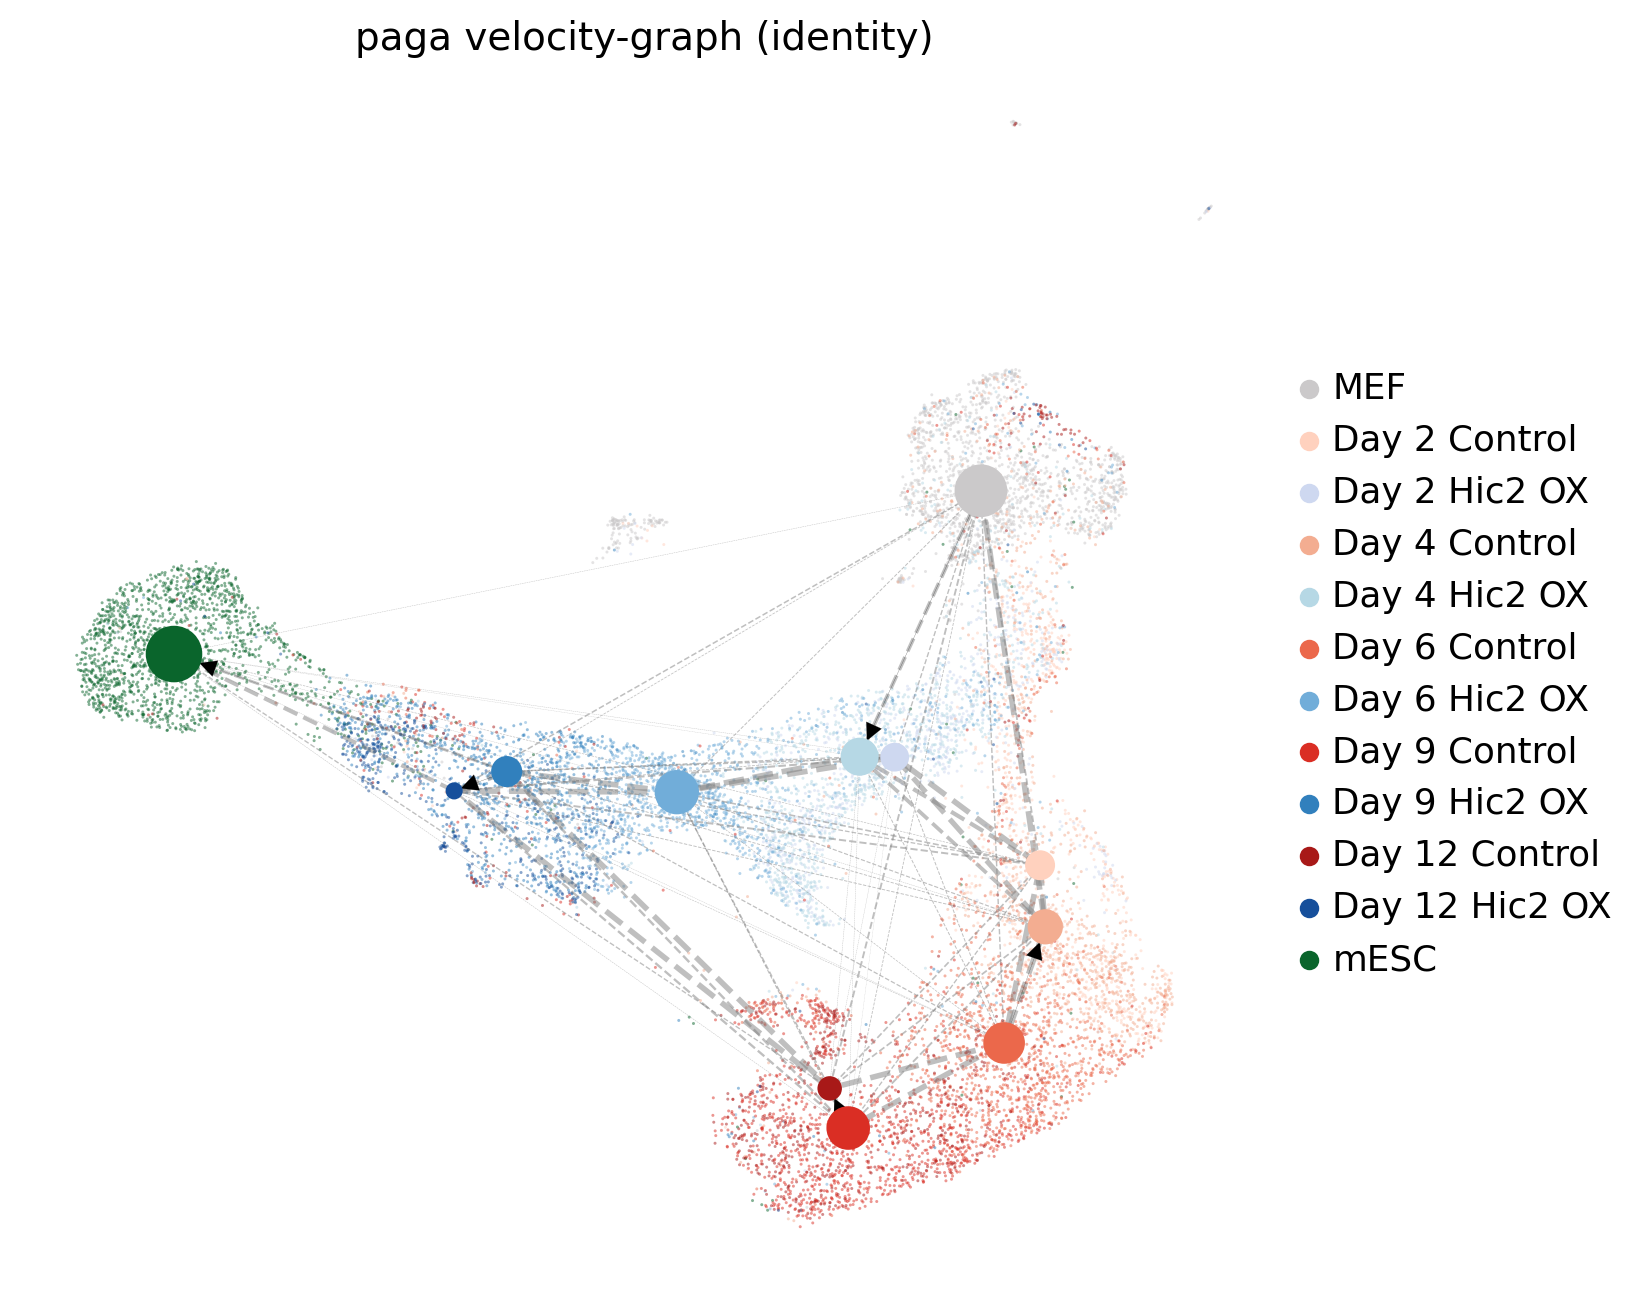

In [59]:
scvelo.pl.paga(adata, basis="umap", figsize=(8,8), node_size_power=2)

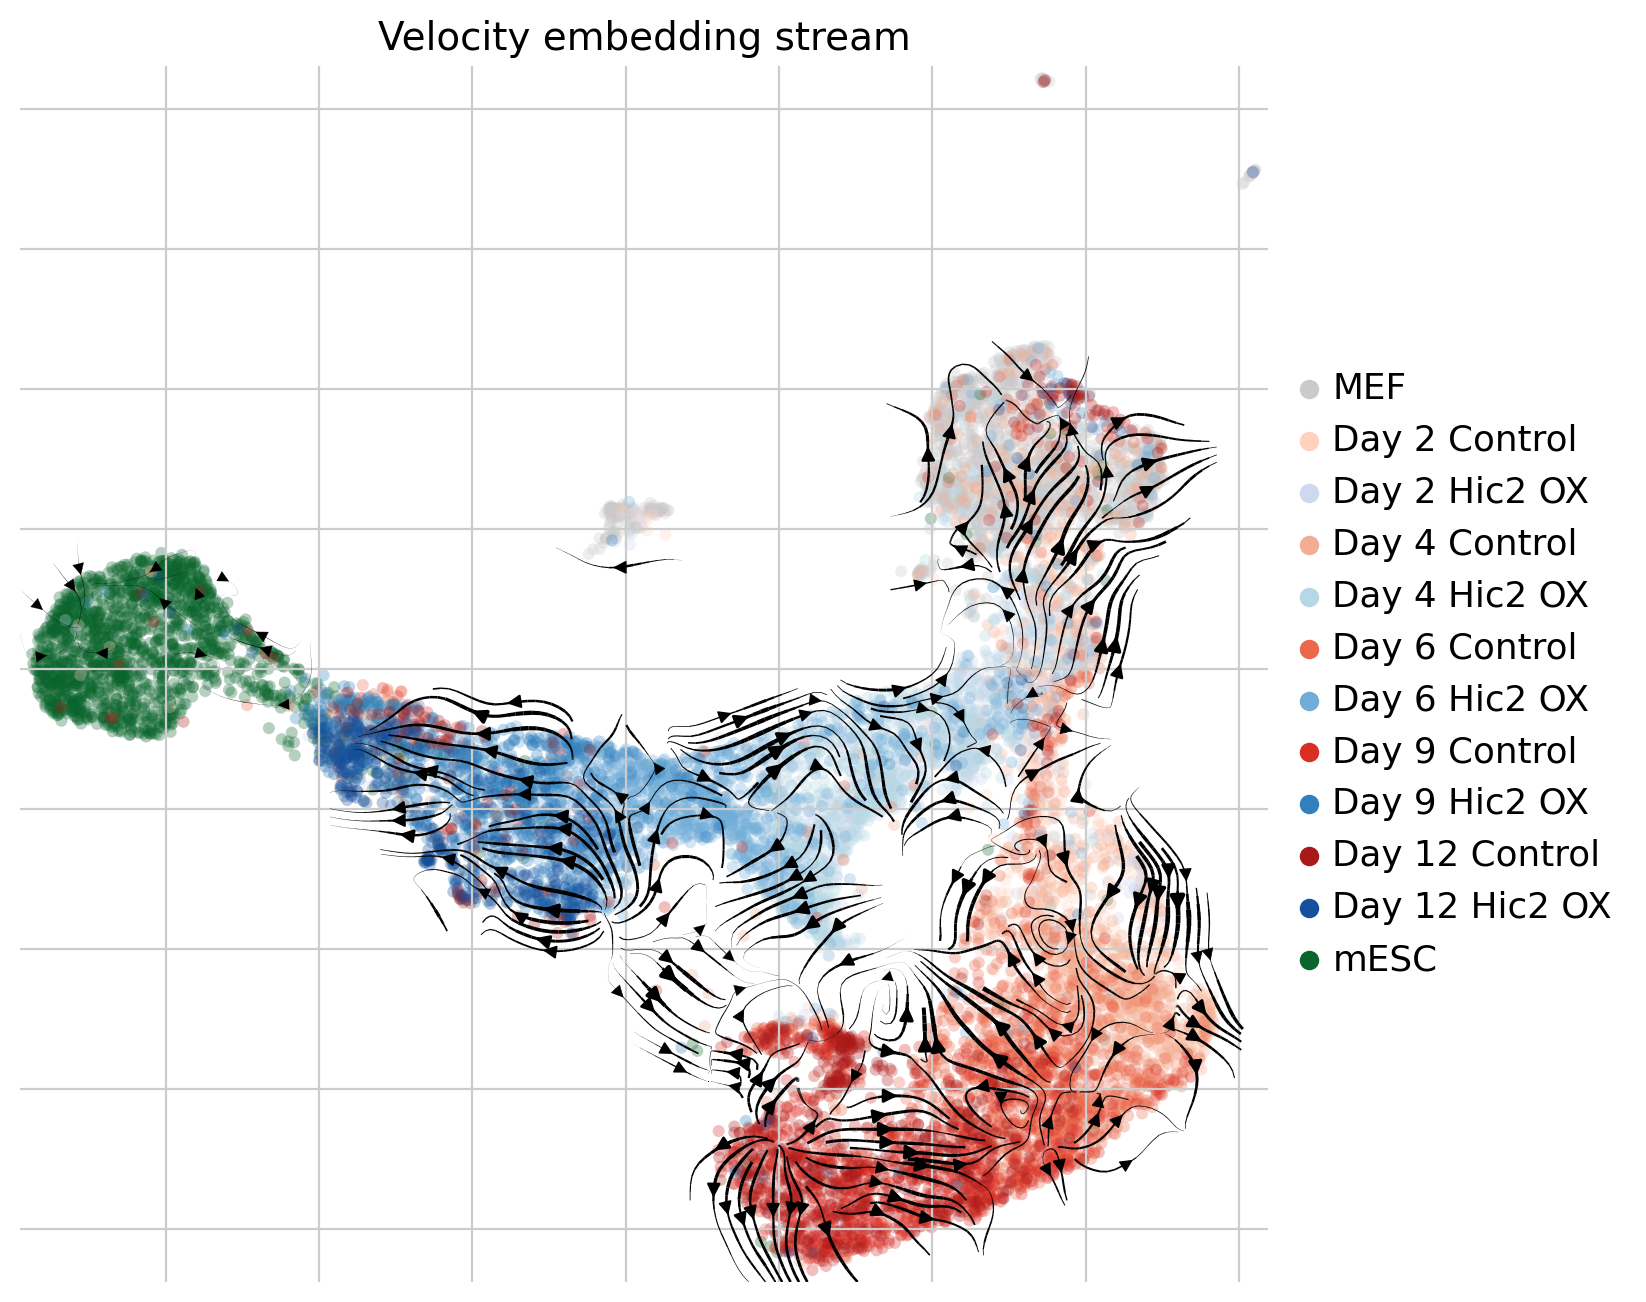

In [60]:
scvelo.pl.velocity_embedding_stream(adata, basis="umap", color="identity", legend_loc="right", figsize=(8,8), title="Velocity embedding stream", density=5)

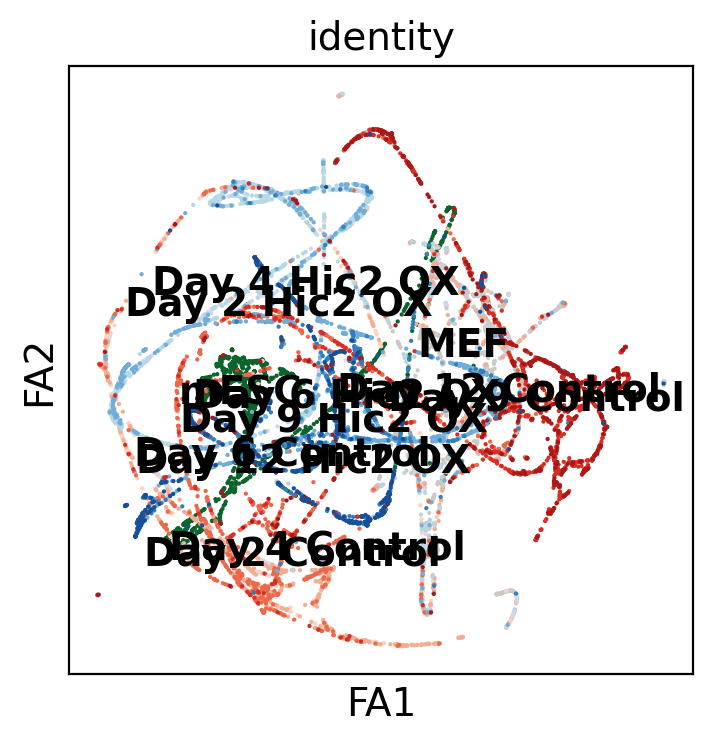

In [61]:
# PAGA
scanpy.tl.diffmap(adata)
scanpy.pp.neighbors(adata, n_neighbors=10, use_rep='X_diffmap')
scanpy.tl.draw_graph(adata)
scanpy.pl.draw_graph(adata, color='identity', legend_loc='on data')

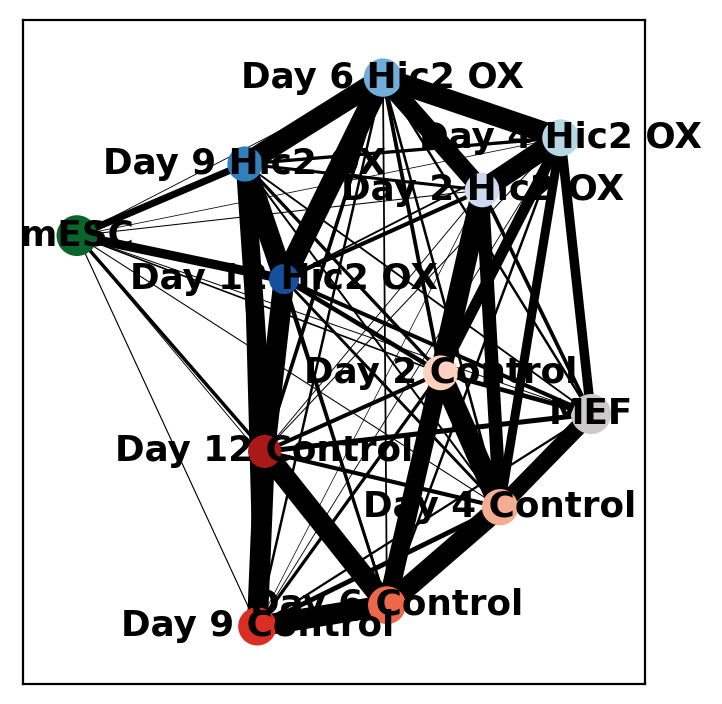

In [62]:
scanpy.tl.paga(adata, groups='identity')
scanpy.pl.paga(adata, color='identity')

In [63]:
scanpy.tl.draw_graph(adata, init_pos='paga')
scanpy.pl.draw_graph(adata, color='identity', legend_loc='on data')

KeyboardInterrupt: 

    adata.uns['iroot'] = root_cell_index
    adata.var['xroot'] = adata[root_cell_name, :].X


KeyError: 'Could not find key dpt_pseudotime in .var_names or .obs.columns.'

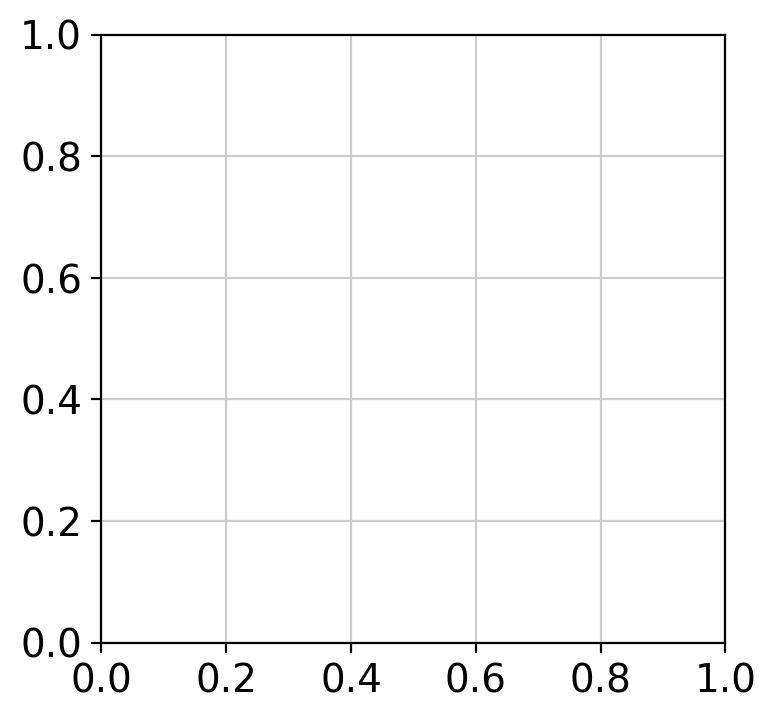

In [ ]:
scanpy.tl.dpt(adata)
scanpy.pl.draw_graph(adata, color='dpt_pseudotime', legend_loc='on data')
scvelo.pl.scatter(adata, color='dpt_pseudotime', color_map='nipy_spectral_r', basis='fdl')